# Backtest Trading Simulator

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date
from src.markets import Market

from src.utils import (market_plot, profit_and_portfolio_value, profits, portfolio_values, liquids, fees_and_tax, yields, plot_performance_metrics, print_performance_summary)

### Simulation parameters

In [2]:
# Arguments
liquid = 100000                             # Initial liquid in USD
tickers = ['AAPL', 'GOOG', 'SPY', 'ORCL', 'TSLA', '^GSPC']   # The tickers of the stocks you would like to trade
periods = [2, 6, 30, 60]                         # Periods list for balancing in days
deposit = 1000
deposit_period = 30
ratios = [0.1, 0.1, 0.25, 0.25, 0.15, 0.15]           # The weight of each stock in the portfolio (adds up to 1)
sell_strategy = 'TAX_OPT'                      # ['LIFO', 'FIFO', 'TAX_OPT']
start_date = (2014, 1, 1)                   # Initial trading date tuple(yyyy, m, d)
end_date = (2018, 1, 1)                     # Final trading date tuple(yyyy, m, d)
buy_fee = 0.01                              # The fee you pay for a single buying transaction (%)
min_buy_fee = 2                             # The minimum ammount of buying fee in USD
sell_fee = 0.01                             # The fee you pay for a single selling transaction (%)
min_sell_fee = 2                            # The minimum ammount of selling fee in USD
tax = 25.                                   # The percentage of tax on selling in profit
verbose = False                             # Print to screen each balancing process [True, False]
plots_normalize = False                     # Normalize the market plot to starting date [True, False]

### Run

In [3]:
from src.main import simulator

# run the simulation
traders_list, market = simulator(
    liquid, tickers, periods, ratios, sell_strategy, start_date, end_date, buy_fee, 
    min_buy_fee, sell_fee, min_sell_fee, tax, verbose, plots_normalize, 
    deposit, deposit_period, show_plots=False, return_traders=True
)

period: 2


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


| Step:    100 /   1007 | Balance period:    2 |
| Step:    200 /   1007 | Balance period:    2 |
| Step:    300 /   1007 | Balance period:    2 |
| Step:    400 /   1007 | Balance period:    2 |
| Step:    500 /   1007 | Balance period:    2 |
| Step:    600 /   1007 | Balance period:    2 |
| Step:    700 /   1007 | Balance period:    2 |
| Step:    800 /   1007 | Balance period:    2 |
| Step:    900 /   1007 | Balance period:    2 |


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

| Step:   1000 /   1007 | Balance period:    2 |
period: 6


| Step:    100 /   1007 | Balance period:    6 |
| Step:    200 /   1007 | Balance period:    6 |
| Step:    300 /   1007 | Balance period:    6 |
| Step:    400 /   1007 | Balance period:    6 |
| Step:    500 /   1007 | Balance period:    6 |
| Step:    600 /   1007 | Balance period:    6 |
| Step:    700 /   1007 | Balance period:    6 |
| Step:    800 /   1007 | Balance period:    6 |
| Step:    900 /   1007 | Balance period:    6 |
| Step:   1000 /   1007 | Balance period:    6 |
period: 30


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


| Step:    100 /   1007 | Balance period:   30 |
| Step:    200 /   1007 | Balance period:   30 |
| Step:    300 /   1007 | Balance period:   30 |
| Step:    400 /   1007 | Balance period:   30 |
| Step:    500 /   1007 | Balance period:   30 |
| Step:    600 /   1007 | Balance period:   30 |
| Step:    700 /   1007 | Balance period:   30 |
| Step:    800 /   1007 | Balance period:   30 |
| Step:    900 /   1007 | Balance period:   30 |
| Step:   1000 /   1007 | Balance period:   30 |


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

period: 60


| Step:    100 /   1007 | Balance period:   60 |
| Step:    200 /   1007 | Balance period:   60 |
| Step:    300 /   1007 | Balance period:   60 |
| Step:    400 /   1007 | Balance period:   60 |
| Step:    500 /   1007 | Balance period:   60 |
| Step:    600 /   1007 | Balance period:   60 |
| Step:    700 /   1007 | Balance period:   60 |
| Step:    800 /   1007 | Balance period:   60 |
| Step:    900 /   1007 | Balance period:   60 |
| Step:   1000 /   1007 | Balance period:   60 |


In [4]:
portfolio_names = []
for (trader, period) in zip(traders_list, periods):
    portfolio_names.append(f"period: {period}")

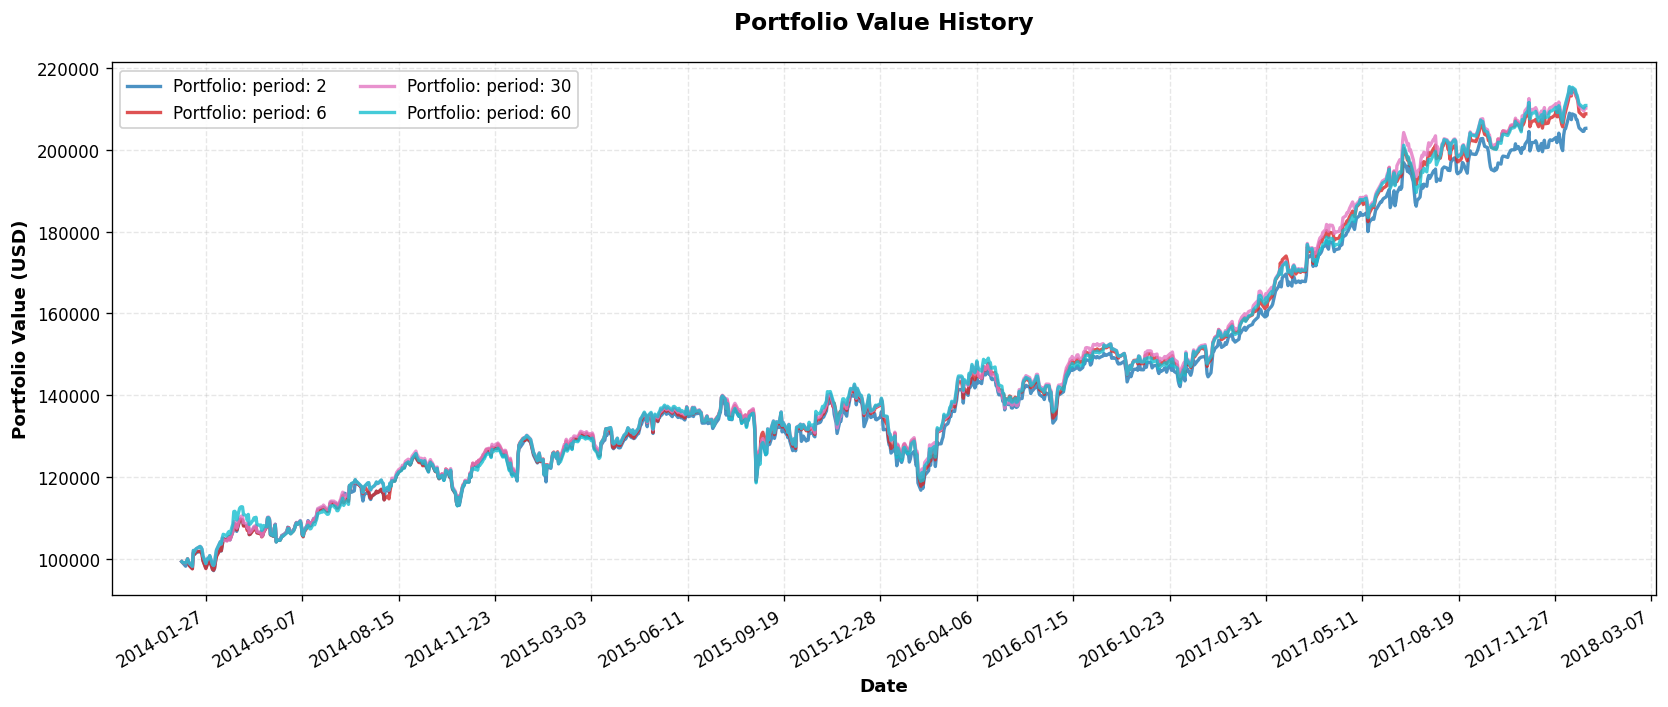

In [5]:
# ==================== Plot 1: Portfolio Value History ====================
portfolio_values(traders_list, portfolio_names, 'Portfolio', use_colors=True)

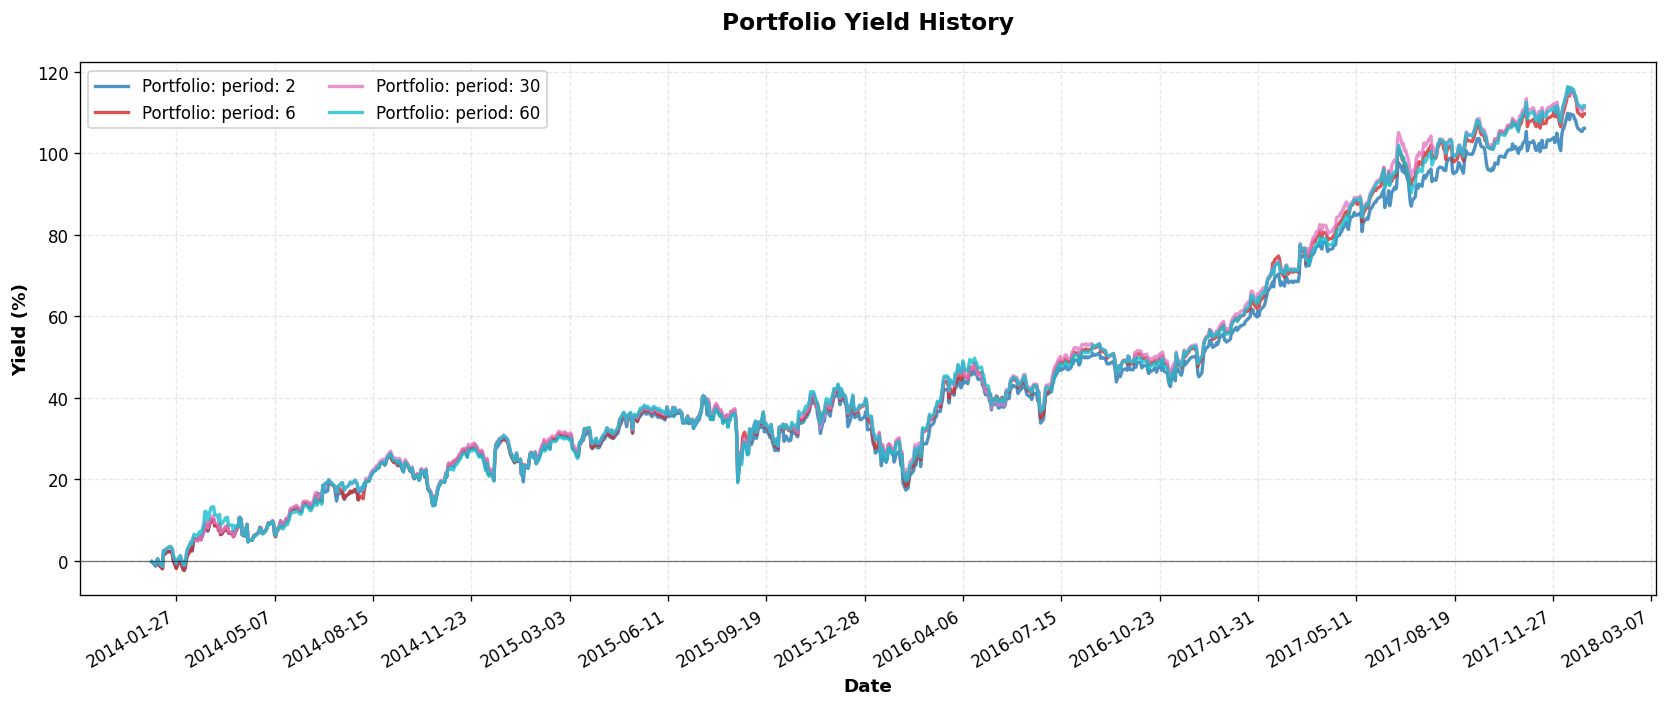

In [6]:
# ==================== Plot 2: Yield History ====================
yields(traders_list, portfolio_names, 'Portfolio', market=None, use_colors=True)

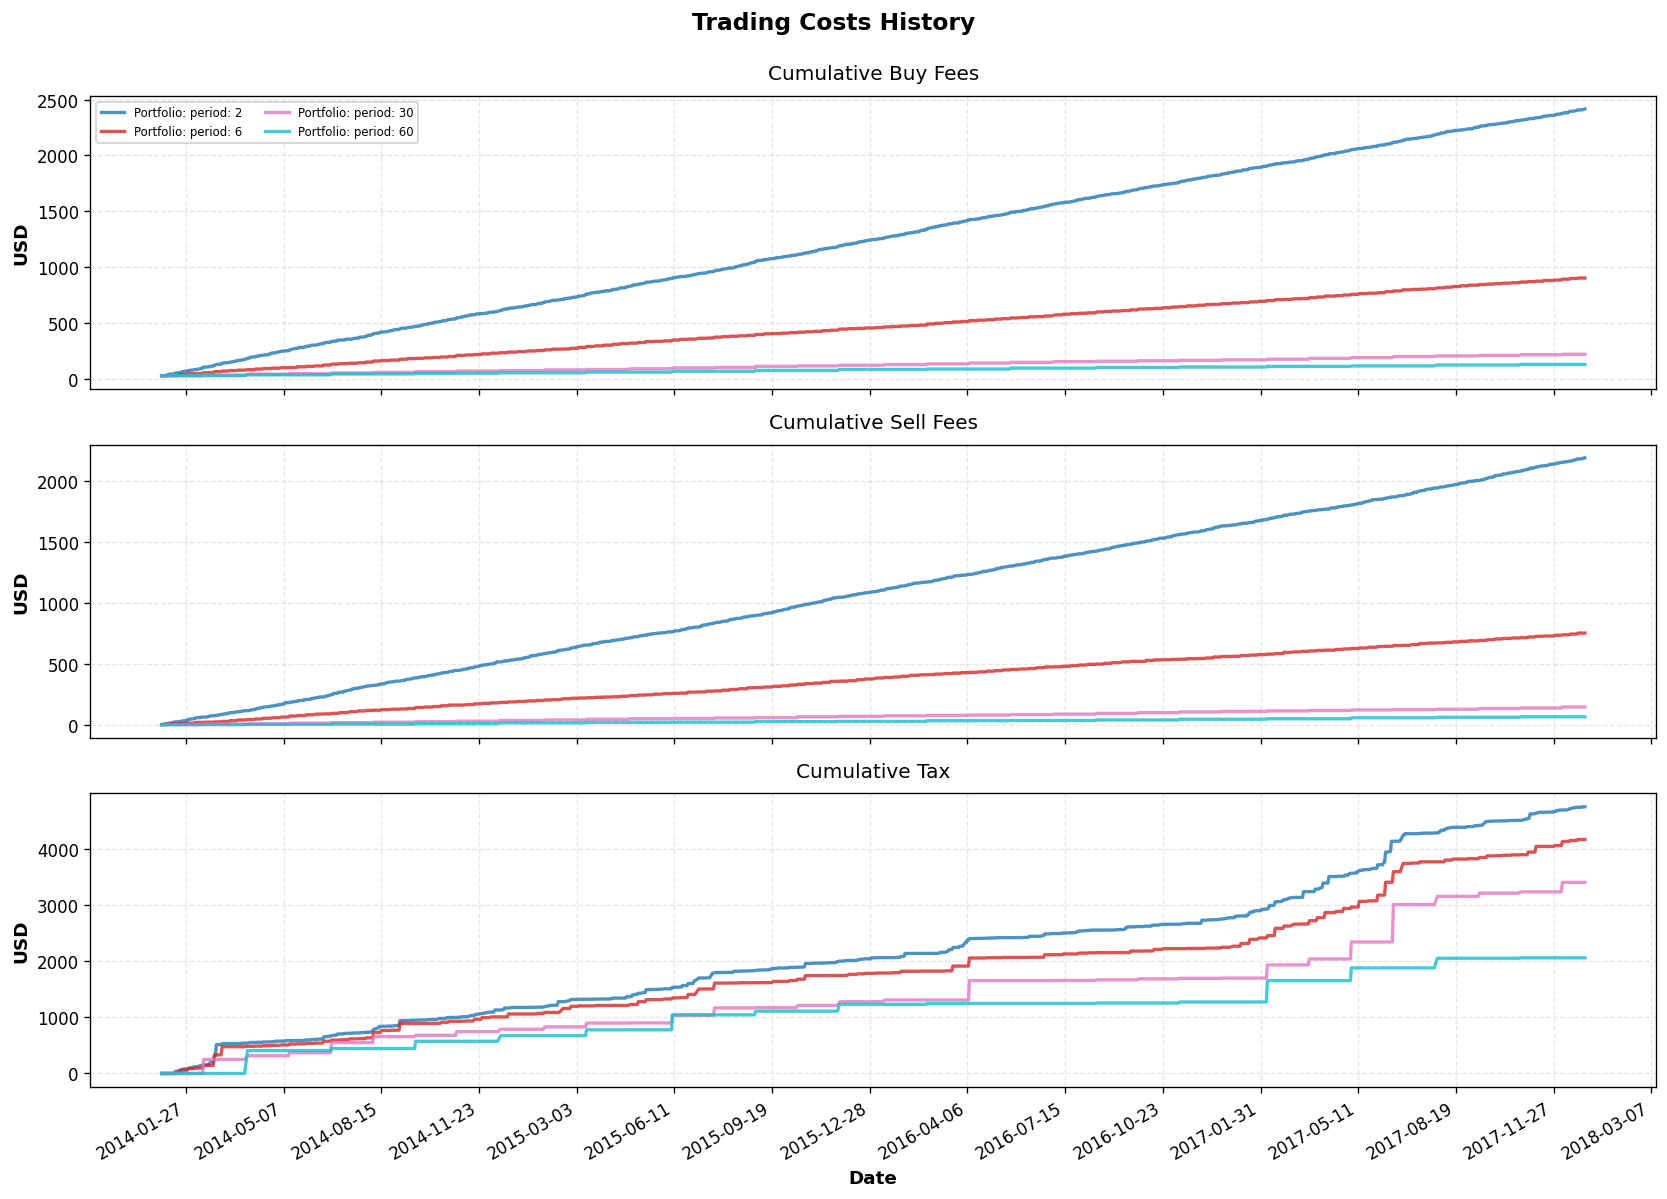

In [7]:
# ==================== Plot 3: Fees and Tax History ====================
fees_and_tax(traders_list, portfolio_names, 'Portfolio', use_colors=True)

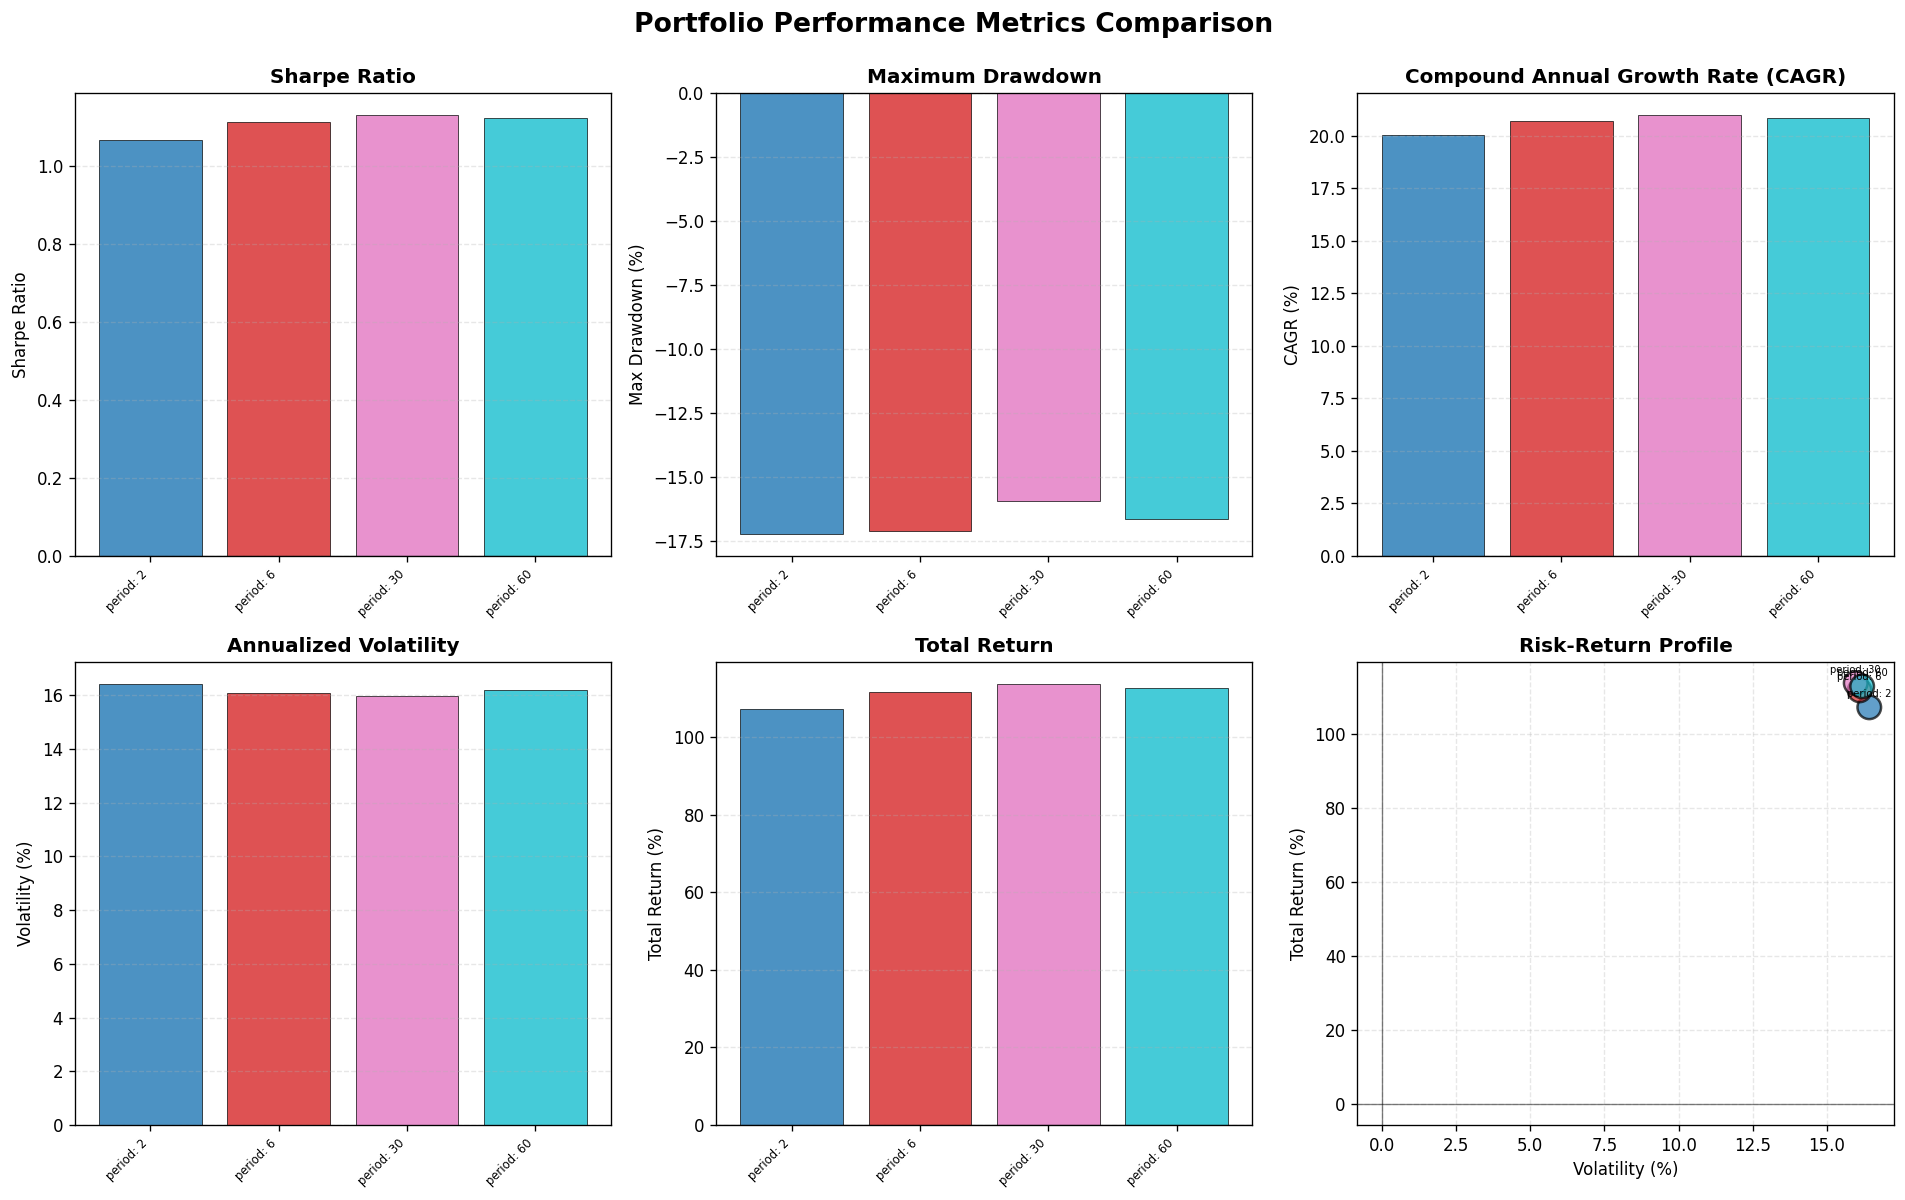

In [8]:
# ==================== Plot 4: Performance Metrics Comparison ====================
plot_performance_metrics(traders_list, portfolio_names, use_colors=True)

In [9]:
# ==================== Print Summary Table ====================
print_performance_summary(traders_list, portfolio_names, start_date, end_date, liquid, periods)


PORTFOLIO PERFORMANCE SUMMARY
Portfolio                 Total Return    CAGR         Sharpe     Volatility   Max DD      
Name                      (%)             (%)          Ratio      (%)          (%)         
------------------------------------------------------------------------------------------------------------------------
period: 2                        107.22%      20.04%      1.07      16.42%     -17.22%
period: 6                        111.80%      20.70%      1.11      16.10%     -17.12%
period: 30                       113.79%      20.98%      1.13      15.97%     -15.92%
period: 60                       112.89%      20.85%      1.12      16.18%     -16.64%

Simulation Period: (2014, 1, 1) to (2018, 1, 1)
Initial Investment: $100,000.00
Rebalancing Period: [2, 6, 30, 60] days

